In [1]:
import matplotlib.pyplot as plt
import numpy as np
import diagnostics as diag
import numpy.ma as ma
import tracemalloc
from iosubdomains import Variable

In [2]:
exp = diag.plume('../../data/Nyles/plume_nonrot/', 'plume_nonrot')
time = exp.time/3600/24
r_lim = 0.35
z_lim = 0.6

In [3]:
Ea = exp.Volume_integral('APE', r_lim, z_lim)

In [4]:
Ek = exp.Volume_integral('KE', r_lim, z_lim)

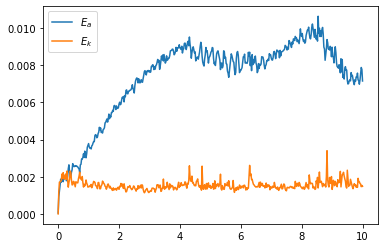

In [5]:
plt.plot(time, Ea, label='$E_a$')
plt.plot(time, Ek, label='$E_k$')
plt.legend()

In [10]:
flux_Ea = exp.Surface_flux('APE', r_lim, z_lim)
flux_Ek = exp.Surface_flux('KE', r_lim, z_lim)

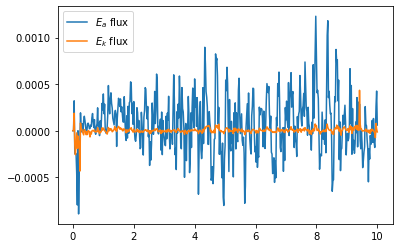

In [41]:
plt.plot(time, flux_Ea, label='$E_a$ flux')
plt.plot(time, flux_Ek, label='$E_k$ flux')
plt.legend()

In [28]:
ϕb = exp.Volume_integral('phi_b', r_lim, z_lim)

In [27]:
ϕz = exp.Volume_integral('phi_z', r_lim, z_lim)

In [ ]:
ϕp = exp.vertical_pressure_flux(r_lim, 1)
# ϕp_2 = exp.Lid_flux('p', r_lim, z_lim)

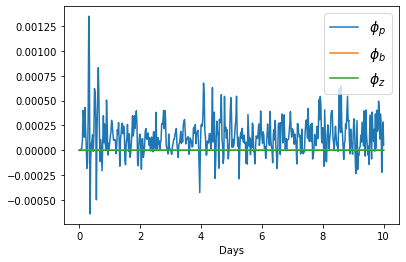

In [77]:
plt.plot(time, ϕp, label='$\phi_{p}$')
plt.plot(time, ϕb, label='$\phi_{b}$')
plt.plot(time, ϕz, label='$\phi_{z}$')
#plt.plot(time, ϕp_2, label='$\phi_{p}$2')
plt.legend(fontsize=14)
plt.xlabel('Days')
plt.savefig('../../Desktop/figs_plume/fluxes_phi_p_dominant')

In [33]:
b = Variable(exp.template, 'b')

In [34]:
w = Variable(exp.template, 'w')

In [35]:
br = b[0,:,0,0]

In [48]:
np.mean(w[100,8])

-2.596991382948499e-07

In [47]:
np.mean(w[100,8]- np.mean(w[100,8]))

-1.3877787807814457e-17

In [46]:
np.mean((b[100, 8] - br[8])*(w[100,8]))

-3.404308395150959e-05

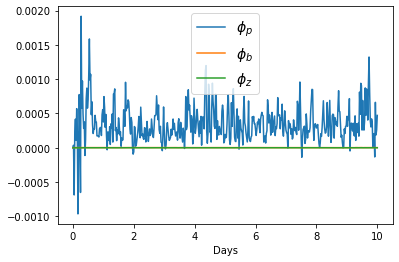

In [52]:
plt.plot(time, ϕp, label='$\phi_{p}$')
plt.plot(time, ϕb, label='$\phi_{b}$')
plt.plot(time, ϕz, label='$\phi_{z}$')

plt.legend(fontsize=14)
plt.xlabel('Days')
plt.savefig('../../Desktop/figs_plume/fluxes_phi_b_phi_z')

In [90]:
ε = (ϕb - ϕz)/(ϕb + ϕp*1e-3)

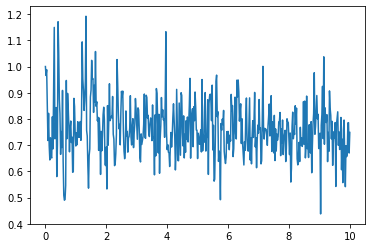

In [91]:
plt.plot(time, ε)

In [62]:
lat_ea_flux_35 = exp.Lateral_flux('APE', 0.35, 0.5)
lat_ea_flux_40 = exp.Lateral_flux('APE', 0.40, 0.55)

In [64]:
lat_ea_flux_45 = exp.Lateral_flux('APE', 0.45, 0.55)

In [66]:
lat_k_flux = exp.Lateral_flux('KE', 0.35, 0.55)

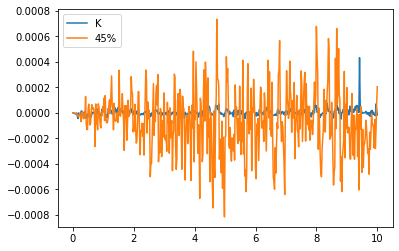

In [68]:

plt.plot(time, lat_k_flux, label='K')
#plt.plot(time, lat_ea_flux_35, label='35%')
#plt.plot(time, lat_ea_flux_40, label='40%')
plt.plot(time, lat_ea_flux_45, label='45%')
plt.legend()